In [1]:
import numpy as np
import pandas as pd
from sklearn import manifold,datasets
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from numba.core.errors import NumbaDeprecationWarning
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

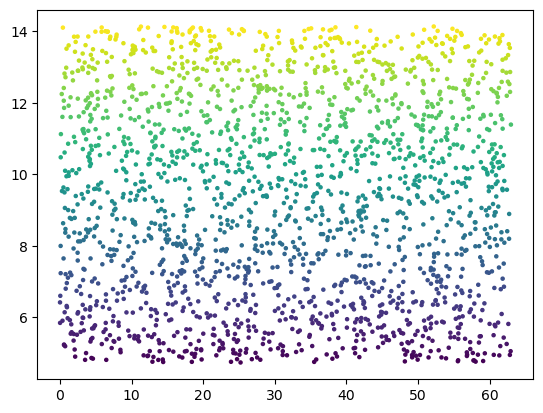

In [3]:
np.random.seed(42)
X, t = datasets.make_swiss_roll(2000,)
X[:, 1] *= 3
ground_truth = np.stack([X[:, 1], t], axis=1)
plt.scatter(ground_truth[:, 0],ground_truth[:, 1], c=t,s =5, cmap = "viridis")

In [4]:
from dtne import *

The code runs 7s.


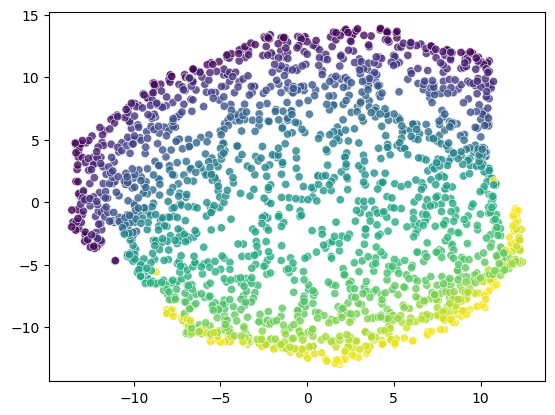

In [5]:
start_time = time.time()
embedding = DTNE()
Y = embedding.fit_transform(X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))

sns.scatterplot(x=-Y[:,0], y=-Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [6]:
def correlation(matrix_A, matrix_B):
    
    from scipy import stats
    n_samples = matrix_A.shape[0]
    pearsonr_correlation_list = []
    spearmanr_correlation_list = []
    for i in range(n_samples):
        pearsonr_res = stats.pearsonr(matrix_A[i], matrix_B[i])
        pearsonr_correlation_list.append(pearsonr_res.statistic) 
        spearmanr_res = stats.spearmanr(matrix_A[i], matrix_B[i])
        spearmanr_correlation_list.append(spearmanr_res.statistic)
        
    pearsonr_correlation_mean = np.mean(pearsonr_correlation_list)
    spearmanr_correlation_mean = np.mean(spearmanr_correlation_list)
    pearsonr_correlation_interval = stats.norm.interval(confidence=0.95, loc=pearsonr_correlation_mean, scale=stats.sem(pearsonr_correlation_list))
    spearmanr_correlation_interval = stats.norm.interval(confidence=0.95, loc=spearmanr_correlation_mean, scale=stats.sem(spearmanr_correlation_list))
    
    correlation_mean = [pearsonr_correlation_mean,spearmanr_correlation_mean]
    correlation_interval = [pearsonr_correlation_interval,spearmanr_correlation_interval]
    
    pearsonr_correlation = [pearsonr_correlation_mean,pearsonr_correlation_interval]
    spearmanr_correlation = [spearmanr_correlation_mean,spearmanr_correlation_interval]
    
    return pearsonr_correlation_list,spearmanr_correlation_list,pearsonr_correlation,spearmanr_correlation 

In [7]:
from scipy import stats,spatial
X_dists = spatial.distance.squareform(spatial.distance.pdist(ground_truth,metric = 'euclidean'))

In [8]:
dists = embedding.dists

In [9]:
corr = correlation(X_dists,dists)
corr[2:]

([0.630408130390196, (0.6218996448925542, 0.6389166158878379)],
 [0.6262922486183993, (0.6161444230997898, 0.6364400741370088)])

In [10]:
tti = manifold.trustworthiness(dists,ground_truth,n_neighbors=50)
tti

0.9637903403481424

The code runs 9s.


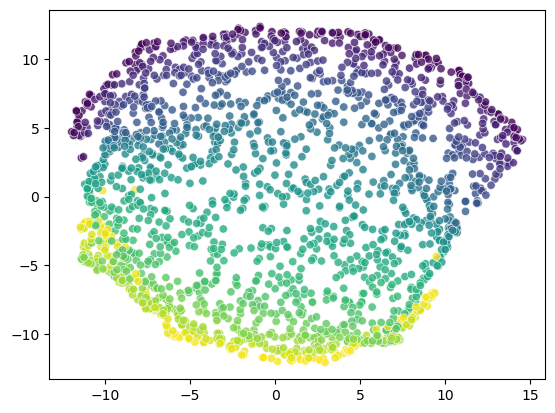

In [11]:
start_time = time.time()
embedding = DTNE(k_neighbors =16)
Y = embedding.fit_transform(X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))

sns.scatterplot(x=-Y[:,0], y=-Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [12]:
dists = embedding.dists
corr = correlation(X_dists,dists)
corr[2:]

([0.6390363857461937, (0.6304762274272294, 0.647596544065158)],
 [0.6346323228889184, (0.624501334215024, 0.6447633115628127)])

In [13]:
tti = manifold.trustworthiness(dists,ground_truth,n_neighbors=50)
tti

0.9638561288646401

In [14]:
np.savetxt("swiss_Y_dtne.csv",-Y,delimiter=',')

The code runs 5s.


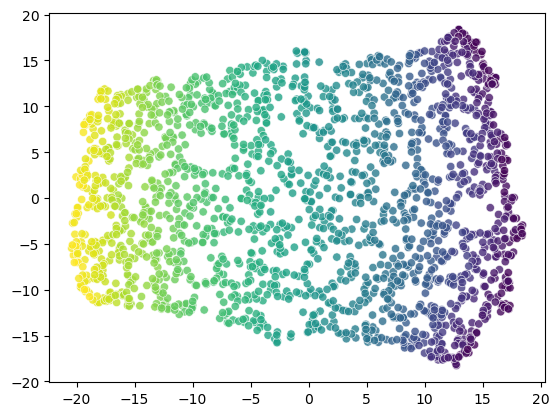

In [15]:
start_time = time.time()
embedding = DTNE(k_neighbors =9,l1=5)
Y = embedding.fit_transform(X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

The code runs 14s.


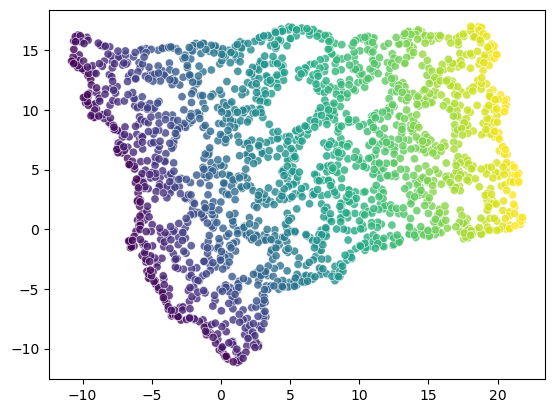

In [16]:
start_time = time.time()
embedding = DTNE(k_neighbors =30,min_dist=0.9,solver = 'umap')
Y = embedding.fit_transform(X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()